In [1]:
#import libraries
import pandas as pd
from pandas import ExcelFile
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df1 = pd.read_csv('C:/Users/EO/Desktop/Josh Folder/NLP/Sex4GradesSentimentAnalysis/Sex4Grades-master/Data/BBCAfricaEye.csv')

In [3]:
df = pd.read_csv('C:/Users/EO/Desktop/Josh Folder/NLP/Sex4GradesSentimentAnalysis/Sex4Grades-master/Data/Sex4Grades.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,2019-10-09 17:32:34,Buhari fight corruption but don't fight #Sex4G...,en,Nigeria,False,Twitter for Android,0,0
1,2019-10-09 17:26:31,Lord forgive me but any man intro himself to m...,en,Nigeria,False,Twitter for Android,0,0
2,2019-10-09 17:14:34,RT @Letitoutgh: It’s typical of @UnivofGh lect...,en,NaN,False,Twitter for iPad,78,0
3,2019-10-09 17:09:11,"Biko nu ,who is the minister of education?\r\n...",en,"Lagos, Nigeria",False,Twitter for Android,0,0
4,2019-10-09 17:04:18,"@emekachukwuleta Like I said, before.. @BBCAfr...",en,"Lagos, Nigeria",False,Twitter for Android,0,0


In [5]:
df1.head(50)

,0,1,2,3,4,5,6,7
0,2019-10-08 11:19:20,"RT @BoombuzzNG: The Unilag lecturer, Dr Bonifa...",en,NaN,False,Twitter for iPhone,2,0
1,2019-10-08 11:17:43,"The Unilag lecturer, Dr Boniface Igbenehue rep...",en,Nigeria,False,Twitter for iPhone,2,1
2,2019-10-07 10:33:58,I love this country they really know how to ke...,en,ABUJA,False,Twitter for Android,0,1
3,2019-10-07 09:35:28,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Nigeria,False,Hootsuite Inc.,0,0
4,2019-10-07 09:30:30,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Nigeria,False,Hootsuite Inc.,0,0
5,2019-10-07 09:28:59,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Nigeria,False,Hootsuite Inc.,0,0
6,2019-10-07 09:25:56,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Lagos,False,Hootsuite Inc.,0,1


In [6]:
df.head().T

,0,1,2,3,4
0,2019-10-09 17:32:34,2019-10-09 17:26:31,2019-10-09 17:14:34,2019-10-09 17:09:11,2019-10-09 17:04:18
1,Buhari fight corruption but don't fight #Sex4G...,Lord forgive me but any man intro himself to m...,RT @Letitoutgh: It’s typical of @UnivofGh lect...,"Biko nu ,who is the minister of education?\r\n...","@emekachukwuleta Like I said, before.. @BBCAfr..."
2,en,en,en,en,en
3,Nigeria,Nigeria,NaN,"Lagos, Nigeria","Lagos, Nigeria"
4,False,False,False,False,False
5,Twitter for Android,Twitter for Android,Twitter for iPad,Twitter for Android,Twitter for Android
6,0,0,78,0,0
7,0,0,0,0,0


In [7]:
df1.head().T

,0,1,2,3,4
0,2019-10-08 11:19:20,2019-10-08 11:17:43,2019-10-07 10:33:58,2019-10-07 09:35:28,2019-10-07 09:30:30
1,"RT @BoombuzzNG: The Unilag lecturer, Dr Bonifa...","The Unilag lecturer, Dr Boniface Igbenehue rep...",I love this country they really know how to ke...,#Mondaymotivation\r\n\r\nTo Improve your busin...,#Mondaymotivation\r\n\r\nTo Improve your busin...
2,en,en,en,en,en
3,NaN,Nigeria,ABUJA,Nigeria,Nigeria
4,False,False,False,False,False
5,Twitter for iPhone,Twitter for iPhone,Twitter for Android,Hootsuite Inc.,Hootsuite Inc.
6,2,2,0,0,0
7,0,1,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 8 columns):
0    1496 non-null object
1    1496 non-null object
2    1496 non-null object
3    1268 non-null object
4    1496 non-null bool
5    1496 non-null object
6    1496 non-null int64
7    1496 non-null int64
dtypes: bool(1), int64(2), object(5)
memory usage: 83.4+ KB


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
0    7 non-null object
1    7 non-null object
2    7 non-null object
3    6 non-null object
4    7 non-null bool
5    7 non-null object
6    7 non-null int64
7    7 non-null int64
dtypes: bool(1), int64(2), object(5)
memory usage: 479.0+ bytes


In [10]:
df.shape

(1496, 8)

In [11]:
df1.shape

(7, 8)

In [12]:
new_df = pd.concat([df1, df], ignore_index=True)

In [13]:
new_df.head()

,0,1,2,3,4,5,6,7
0,2019-10-08 11:19:20,"RT @BoombuzzNG: The Unilag lecturer, Dr Bonifa...",en,NaN,False,Twitter for iPhone,2,0
1,2019-10-08 11:17:43,"The Unilag lecturer, Dr Boniface Igbenehue rep...",en,Nigeria,False,Twitter for iPhone,2,1
2,2019-10-07 10:33:58,I love this country they really know how to ke...,en,ABUJA,False,Twitter for Android,0,1
3,2019-10-07 09:35:28,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Nigeria,False,Hootsuite Inc.,0,0
4,2019-10-07 09:30:30,#Mondaymotivation\r\n\r\nTo Improve your busin...,en,Nigeria,False,Hootsuite Inc.,0,0


In [14]:
new_df.drop(['0','2','3','4','5','6','7'],axis=1,inplace=True)

In [15]:
new_df.head()

,1
0,"RT @BoombuzzNG: The Unilag lecturer, Dr Bonifa..."
1,"The Unilag lecturer, Dr Boniface Igbenehue rep..."
2,I love this country they really know how to ke...
3,#Mondaymotivation\r\n\r\nTo Improve your busin...
4,#Mondaymotivation\r\n\r\nTo Improve your busin...


In [16]:
#renmae column
new_df.rename(columns = {'1': 'Tweets'}, inplace = True)

In [17]:
new_df.head(30)

,Tweets
0,"RT @BoombuzzNG: The Unilag lecturer, Dr Bonifa..."
1,"The Unilag lecturer, Dr Boniface Igbenehue rep..."
2,I love this country they really know how to ke...
3,#Mondaymotivation\r\n\r\nTo Improve your busin...
4,#Mondaymotivation\r\n\r\nTo Improve your busin...
5,#Mondaymotivation\r\n\r\nTo Improve your busin...
6,#Mondaymotivation\r\n\r\nTo Improve your busin...
7,Buhari fight corruption but don't fight #Sex4G...
8,Lord forgive me but any man intro himself to m...
9,RT @Letitoutgh: It’s typical of @UnivofGh lect...


In [ ]:
# Clean the text using a function

In [18]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @mentions
    text = re.sub(r'#', '', text)#Removes # symbol
    text = re.sub(r'RT[\s]+','', text) # Removes RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Removes the hyperlink
    text = re.sub(r'|[,:;_-]+','', text) #Removes undersccores
    text = re.sub(r'[\n\r\t]', '', text)#removes \r\n\t characters
    text = re.sub(r"Sex4Grade",'', text)
    text = re.sub(r"sex4grades",'', text)
    text = re.sub(r"re",'', text)
    
    
    return text

In [19]:
new_df['Tweets'] = new_df['Tweets'].apply(cleanTxt)

In [20]:
new_df.head(30)

,Tweets
0,The Unilag lectur Dr Boniface Igbenehue porte...
1,The Unilag lectur Dr Boniface Igbenehue ported...
2,I love this country they ally know how to keep...
3,MondaymotivationTo Improve your business produ...
4,MondaymotivationTo Improve your business produ...
5,MondaymotivationTo Improve your business produ...
6,MondaymotivationTo Improve your business produ...
7,Buhari fight corruption but don't fight sCoz I...
8,Lord forgive me but any man intro himself to m...
9,It’s typical of lecturs to sort to courting ...


In [ ]:
# Remove emojis

In [21]:
import emoji

In [22]:
def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

In [23]:
new_df['Tweets'] = new_df['Tweets'].apply(give_emoji_free_text)

In [24]:
new_df.head(300)

,Tweets
0,The Unilag lectur Dr Boniface Igbenehue porte...
1,The Unilag lectur Dr Boniface Igbenehue ported...
2,I love this country they ally know how to keep...
3,MondaymotivationTo Improve your business produ...
4,MondaymotivationTo Improve your business produ...
5,MondaymotivationTo Improve your business produ...
6,MondaymotivationTo Improve your business produ...
7,Buhari fight corruption but don't fight sCoz I...
8,Lord forgive me but any man intro himself to m...
9,It’s typical of lecturs to sort to courting ...


In [ ]:
'''create a function to get the subjectivity of tweets
this shows how opinionated the text

In [25]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [42]:
# create a function to get the polarity
# this tells how positive or negative the tweets are

In [26]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# Create 2 new ccolumns - one subjectivity and the other polarity

In [27]:
new_df['Subjectivity'] = new_df['Tweets'].apply(getSubjectivity)

In [28]:
new_df['Polarity'] = new_df['Tweets'].apply(getPolarity)

In [29]:
new_df.head()

,Tweets,Subjectivity,Polarity
0,The Unilag lectur Dr Boniface Igbenehue porte...,0.000000,0.0
1,The Unilag lectur Dr Boniface Igbenehue ported...,0.000000,0.0
2,I love this country they ally know how to keep...,0.555556,0.5
3,MondaymotivationTo Improve your business produ...,0.000000,0.0
4,MondaymotivationTo Improve your business produ...,0.000000,0.0


In [ ]:
## seeing how well the sentences are distributed

In [ ]:
#plot wordcloud

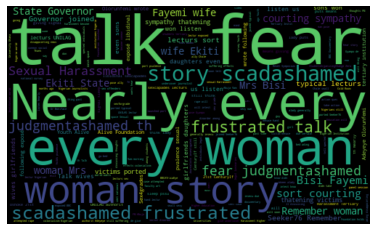

In [30]:
allWords = ' '.join( [twts for twts in new_df['Tweets']])
wordCloud = WordCloud(width = 500, height=300,random_state=42, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function tocompute the negative, neutral and positive analysis

In [31]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [32]:
new_df['Analysis'] = new_df['Polarity'].apply(getAnalysis)

In [33]:
# Show dataframe
new_df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,The Unilag lectur Dr Boniface Igbenehue porte...,0.000000,0.000000,Neutral
1,The Unilag lectur Dr Boniface Igbenehue ported...,0.000000,0.000000,Neutral
2,I love this country they ally know how to keep...,0.555556,0.500000,Positive
3,MondaymotivationTo Improve your business produ...,0.000000,0.000000,Neutral
4,MondaymotivationTo Improve your business produ...,0.000000,0.000000,Neutral
5,MondaymotivationTo Improve your business produ...,0.000000,0.000000,Neutral
6,MondaymotivationTo Improve your business produ...,0.000000,0.000000,Neutral
7,Buhari fight corruption but don't fight sCoz I...,0.500000,-0.250000,Negative
8,Lord forgive me but any man intro himself to m...,0.285714,-0.435965,Negative
9,It’s typical of lecturs to sort to courting ...,0.500000,-0.166667,Negative


In [ ]:
# Print all of the positive tweets

In [34]:
j=1
sortedDF = new_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+(sortedDF['Tweets'][i]))
        print()
        j+=1

1) I love this country they ally know how to keep us entertained just after the wonderful completion of BBN last nig… 

2)  Like I said befo..  am proud of you.When it was  and his wife then you g… 

3)  We will soon tell you about how spected individuals and legal luminaries in University of Ghana a shielding their colle…

4)  A lot of girls will give everything for good grades But that is still not an excuse for a lectur to t… 

5) I don't feel Kiki should have vealed her identity Nigeria isn't so secu! I wish her the best. Btw she can ach… 

6) Two down... Many many mo to go  

7) Kennedy Ekezie was honod by Queen Elizabeth for raising $2m to start mentorship programs for young Africans all… 

8)  After tonight's conversation on radio about Sex4grades i have come to the conclusion that some  men a sexual pdators by d…

9) The true winners a the ones who win in life. Good morning from @houseofjersey HipHopAwards19 Sex4grades… 

10) s in our higher institutions of learning is been inv

246)  Sexual harassment has become a common social disorder among students in tertiary institutions in Nigeria and the world over. The…

247)  Watch this space..... Sexual Harassment in Higher Education (SHE) will be a thing of the past in no time. Our institutions a…

248)  The is a leader of sexforgrades at uniport in Social science department I wonder why he wasn't captud even that Birabi…

249)  This expose makes me so happy. When your cup is full  

250)  This expose makes me so happy. When your cup is full  

251)  Sexual harassment has become a common social disorder among students in tertiary institutions in Nigeria and the world over. The…

252)  Send undercover agent to Federal Polytechnic Ede Osun state. Many scapegoats a the waiting for you. 

253) Its a gud thing dat the lectur was exposed.Soladies who gladly age to  can see the harm they too c… 

254)  The is a leader of sexforgrades at uniport in Social science department I wonder why he wasn't captud even that Birabi…



In [ ]:
# print negative tweeets

In [35]:
j=1
sortedDF = new_df.sort_values(by=['Polarity'], ascending='False ')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+(sortedDF['Tweets'][i]))
        print()
        j+=1

1) Buhari fight corruption but don't fight sCoz If not many girls in Unilag  won't graduate

2) Lord forgive me but any man intro himself to me as a Pastor I'm grabbing my daughter and my wallet tightly!!!! Unti… 

3)  It’s typical of  lecturs to sort to courting sympathy or thatening victims when they a ported.This was…

4) A similar technology was deplod to exposing  on his dollars corrupt allegation but … 

5)   Thank you!I dont know why people fail to have sense. This is how things a and should be done.… 

6) G I was never harassed by lecturs for s! My mum taught me days b4 suming never go late for lectus and never…

7)  Monday was “Cold Room”. Tuesday was “Cold” induced by hard work...Please I’m waiting for the “Cold Word” for Wednesday…

8)  Monday was “Cold Room”. Tuesday was “Cold” induced by hard work...Please I’m waiting for the “Cold Word” for Wednesday…

9) Adomadee In Ghana now everyday the's a diffent to talk about Not long we had the CSEThen taxes incment Then  a…

10) I

In [ ]:
#plot polarity and subjectivity

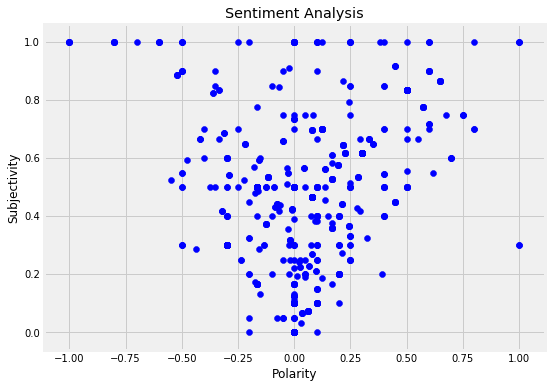

In [37]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(new_df['Polarity'][i], new_df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
Ptweets = new_df[new_df.Analysis == 'Positive']
Ptweets = Ptweets['Tweets']

In [40]:
# no. of positive tweets
Ptweets.shape[0]

439

In [ ]:
# Percentage of Positive Tweets

In [41]:
round((Ptweets.shape[0] / new_df.shape[0]) * 100, 1)

29.2

In [ ]:
# no of negative tweets

In [42]:
Ntweets = new_df[new_df.Analysis == 'Negative']
Ntweets = Ntweets['Tweets']

In [43]:
Ntweets.shape[0]

389

In [44]:
round((Ntweets.shape[0] / new_df.shape[0]) * 100, 1)

25.9

In [ ]:
# no of neutral tweets

In [45]:
NTtweets = new_df[new_df.Analysis == 'Neutral']
NTtweets = NTtweets['Tweets']

In [46]:
NTtweets.shape[0]

675

In [47]:
round((NTtweets.shape[0] / new_df.shape[0]) * 100, 1)

44.9

In [48]:
new_df['Analysis'].value_counts()

Neutral     675
Positive    439
Negative    389
Name: Analysis, dtype: int64

In [ ]:
# plot and visualize

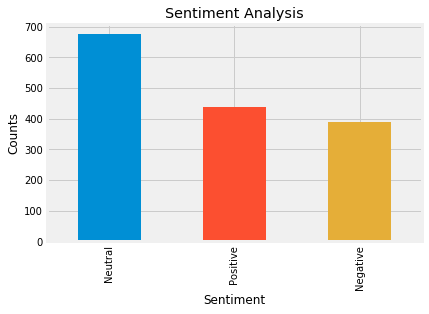

In [49]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
new_df['Analysis'].value_counts().plot(kind='bar')
plt.show()